## Data Jobs Requirements Sunburst Diagram

In [34]:
import re
from itertools import combinations
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from IPython import display
from bs4 import BeautifulSoup as bs

from nbstyler import DATA_STYLE as DS

plotly.offline.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline

%matplotlib notebook
%matplotlib inline


In [35]:
data_querystr = """SELECT * FROM v_full_data_offers_history"""
conn = psycopg2.connect('dbname=jobsbg')
data_df = pd.read_sql_query(data_querystr, conn, index_col='subm_date')
conn.close()

### Prototyping the Chart with Matplotlib

In [75]:
def sunburst(nodes, total=np.pi * 2, offset=0, level=0, ax=None):
    """Recursively build a matplotlib sunburst chart.
    
    See: https://stackoverflow.com/a/46790802 for details.
    """

    ax = ax or plt.subplot(111, projection='polar')
    plt.rcParams["figure.figsize"] = [16.0, 9.0]

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi * 2])
        ax.text(0, 0, label, ha='center', va='center')
        sunburst(subnodes, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset

        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)
            sunburst(subnodes, total=total, offset=local_offset,
                     level=level + 1, ax=ax)
            local_offset += value

        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5
        rects = ax.bar(values, heights, widths, bottoms, linewidth=1,
                       edgecolor='white', align='edge')

        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            ax.text(x, y, label, rotation=rotation, ha='center', va='center')

    if level == 0:
        ax.set_theta_direction(-1)

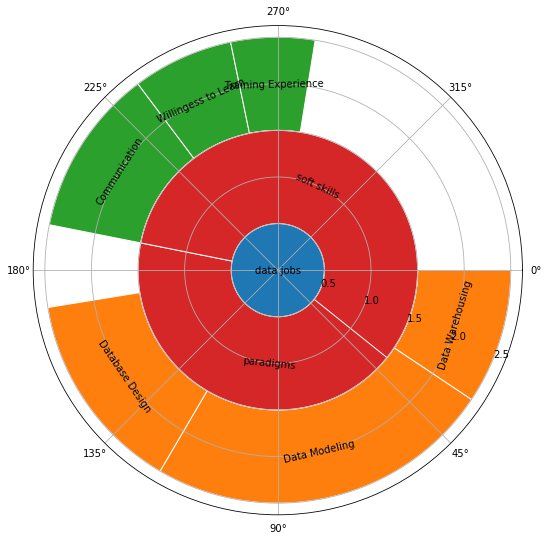

In [74]:
data = [
    ('data jobs', 1600, [
        ('paradigms', 850, [
            ('Data Warehousing', 150, []),
            ('Data Modeling', 385, []),
            ('Database Design', 224, []),
        ]),
        ('soft skills', 922, [
            ('Communication', 186, []),
            ('Willingess to Learn', 112, []),
            ('Training Experience', 93, []),
        ]),
    ]),
]

sunburst(data)

In [31]:
# Uncomment the line below to export an HTML version of the chart.
#plotly.offline.plot(fig, filename='data_offers_tech_requirements_chord.html', show_link=False)

'file:///data/WORKSPACE/jpynb_Employment_Trends_Bulgaria/workbooks/data_offers_tech_requirements_chord.html'

### Resources:

- https://stackoverflow.com/a/46790802

In [78]:
from IPython.core.display import HTML
with open('../resources/styles/datum.css', 'r') as f:
    style = f.read()
HTML(style)